<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task2/blob/main/DL_task2_Robertuito_29_8_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis del carácter sexista de tweets en idioma Español. Se utiliza el modelo preentrenado Robertuito.**

Falta una prueba para task2 aumentando datos : traducidos al español más los de swapping. Hay que aumentar los dats de test mediante la traducción de los twwet en inglés al español.

##<font color='brown'>**Carga de los datos**</font>

1. Conjunto de datos train y test compuesto por tweets en Español.
2. Al conjunto train se añaden los tweets en inglés traducidos al Español en alguna de las pruebas.
3. Se aplica el modelo con la opción 2 y sin ella a las tareas de clasificación para la clase objetivo task1 y task2.

In [ ]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/EXIST2021_training.tsv', delimiter=',', encoding='latin1')
#test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', delimiter=',', encoding='latin1')

import pandas as pd

# Leer los archivos TSV y seleccionar las columnas deseadas y filtrar por idioma 'es'
test = pd.read_csv('/content/EXIST2021_test_labeled.tsv', sep='\t', usecols=['text', 'language', 'task2']).loc[lambda df: df['language'] == 'es']
train_data = pd.read_csv('/content/EXIST2021_training.tsv', sep='\t', usecols=['text', 'language', 'task2']).loc[lambda df: df['language'] == 'es']
train_data_es = pd.read_csv('/content/train_data_translated_from_en_to_es.csv', sep=',', usecols=['text', 'language', 'task2']).loc[lambda df: df['language'] == 'en']
swapp = pd.read_csv('/content/swapp_EXIST2021_training.tsv', sep='\t', usecols=['text', 'language', 'task2']).loc[lambda df: df['language'] == 'es']

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
test = test.loc[(test['task2'] != 'non-sexist') & (test['language'] == 'es')]
train_data = train_data.loc[(train_data['task2'] != 'non-sexist') & (train_data['language'] == 'es')]
train_data_es = train_data_es.loc[(train_data_es['task2'] != 'non-sexist') & (train_data_es['language'] == 'en')]
swapp = swapp.loc[(swapp['task2'] != 'non-sexist') & (swapp['language'] == 'es')]

train_data = shuffle(train_data, random_state=42)

In [ ]:
# Concatenar train_data y train_data_en en un único DataFrame llamado train_data
train_data = pd.concat([train_data, train_data_es], ignore_index=True)
train_data = shuffle(train_data, random_state=42)

# Verificar el resultado
print(train_data.head())


     language                                               text  \
3263       en  Si "centramos todas las experiencias", no se c...   
144        es  me he dado cuenta q las mujeres tauro son fabu...   
1231       es  no voy a superar la vez que soñé que yeojin me...   
3001       en                  @CalumTheNBHDSOS lo que sea zorra   
1052       es  @aleperaltamerlo Lo raro es que no salió a mat...   

                             task2  
3263        ideological-inequality  
144                objectification  
1231        ideological-inequality  
3001        stereotyping-dominance  
1052  misogyny-non-sexual-violence  


In [ ]:
# Concatenar train_data y train_data_en en un único DataFrame llamado train_data
train_data = pd.concat([train_data, swapp], ignore_index=True)
train_data = shuffle(train_data, random_state=42)

# Verificar el resultado
print(train_data.head())

     language                                               text  \
730        en  @ SimonONeill1966 @reality_driven @mglennie @i...   
4755       es  El Truco está en seguir escribiendo pelotudece...   
3066       es  @dalila_sin Mansplaining, gaslighting, manterr...   
4912       es  Hace un año pasé un gran día con esta pedazo m...   
217        es  @aburrido354 A TODA MECHA, A TODA MECHATU NO T...   

                       task2  
730   ideological-inequality  
4755         objectification  
3066  ideological-inequality  
4912         objectification  
217          sexual-violence  


In [ ]:
# Seleccionar solo las columnas 'text' y 'task2'
test = test[['text', 'task2']]
train_data = train_data[['text', 'task2']]

##<font color='brown'>**Adaptar el dataset a las características del modelo**</font>

In [ ]:
# Cambiar el nombre de la columna 'task2' a 'label'
test.rename(columns={'task2': 'label'}, inplace=True)
train_data.rename(columns={'task2': 'label'}, inplace=True)

##<font color='brown'>**Estructura y organización de la clase objetivo**</font>

In [ ]:
columna_clase_objetivo = "label"

df = train_data

# Contar la cantidad de categorías únicas en la columna de la clase objetivo
cantidad_categorias = df[columna_clase_objetivo].nunique()

# Contar la cantidad de muestras para cada categoría de la clase objetivo
muestras_por_categoria = df[columna_clase_objetivo].value_counts()

# Imprimir los resultados
print("Cantidad de categorías:", cantidad_categorias)
print("Muestras por categoría:")
print(muestras_por_categoria)
df.shape[0]

Cantidad de categorías: 5
Muestras por categoría:
ideological-inequality          1700
stereotyping-dominance          1549
misogyny-non-sexual-violence    1357
objectification                  924
sexual-violence                  812
Name: label, dtype: int64


6342

In [ ]:
columna_clase_objetivo = "label"

df = test

# Contar la cantidad de categorías únicas en la columna de la clase objetivo
cantidad_categorias = df[columna_clase_objetivo].nunique()

# Contar la cantidad de muestras para cada categoría de la clase objetivo
muestras_por_categoria = df[columna_clase_objetivo].value_counts()

# Imprimir los resultados
print("Cantidad de categorías:", cantidad_categorias)
print("Muestras por categoría:")
print(muestras_por_categoria)
df.shape[0]

Cantidad de categorías: 5
Muestras por categoría:
ideological-inequality          288
misogyny-non-sexual-violence    257
stereotyping-dominance          202
sexual-violence                 202
objectification                 174
Name: label, dtype: int64


1123

##<font color='brown'>**Creación de los conjuntos de datos**</font>
1. Asignación de las muestras para los conjuntos de dtos train y validación.
2. Visualización del número de muestras.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir train_data en train y validation (80% train, 20% validation)
train, validation = train_test_split(train_data, test_size=0.2, random_state=42)

# Obtener el número total de muestras en cada conjunto
total_train_samples = train.shape[0]
total_validation_samples = validation.shape[0]
total_test_samples = test.shape[0]

print("Total de muestras en el conjunto de entrenamiento:", total_train_samples)
print("Total de muestras en el conjunto de validación:", total_validation_samples)
print("Total de muestras en el conjunto de test:", total_test_samples)

Total de muestras en el conjunto de entrenamiento: 5073
Total de muestras en el conjunto de validación: 1269
Total de muestras en el conjunto de test: 1123


##<font color='brown'>**Tarea 2.Task2**</font>

Conversión de las categorias, de la clase objetivo, de string a numéricas.

In [ ]:
# Definir la función de conversión de etiquetas
def convert_labels(label):
    label_mapping = {
        "ideological-inequality": 0,
        "misogyny-non-sexual-violence": 1,
        "stereotyping-dominance": 2,
        "sexual-violence": 3,
        "objectification": 4
    }
    return label_mapping.get(label, -1)  # Devolver -1 para etiquetas no esperadas

# Convertir las etiquetas en los DataFrames
train['label'] = train['label'].apply(convert_labels)
validation['label'] = validation['label'].apply(convert_labels)
test['label'] = test['label'].apply(convert_labels)

In [ ]:
import pandas as pd

# Ejemplo con el conjunto de entrenamiento
print(train.head())  # Muestra las primeras filas del DataFrame
print(train['label'].dtype)  # Muestra el tipo de dato de la columna 'label'


                                                   text  label
2142  @AngelaBelcamino @realDonaldTrump Pareces una ...      4
5361  YoSíTeCreoEl # juez que pidió la absolución de...      3
176   27 dias tic toc tic toc #RevocatoriaClaudiaLop...      2
5834  Hoy me he comprado un . patinete.. y he dejado...      2
1267  EXACTAMENTE. Pensé lo mismo mientras veía el v...      2
int64


In [ ]:
import pandas as pd

# Ejemplo con el conjunto de entrenamiento
print(test.head())  # Muestra las primeras filas del DataFrame
print(test['label'].dtype)  # Muestra el tipo de dato de la columna 'label'


                                                   text  label
2208                      Y te golpeo más fuerte perra.      1
2210  @MaricaIndomito jajajaj el me he topado con ta...      2
2212  @EstefMolina_ Los que dicen que creen en la ig...      0
2215  por dios como no podes querer a mis gatas conc...      4
2218  Mujer al volante causa terror (Video) - https:...      2
int64


In [ ]:
test.head(10)

,text,label
2208,Y te golpeo más fuerte perra.,1
2210,@MaricaIndomito jajajaj el me he topado con ta...,2
2212,@EstefMolina_ Los que dicen que creen en la ig...,0
2215,por dios como no podes querer a mis gatas conc...,4
2218,Mujer al volante causa terror (Video) - https:...,2
2220,@NacionDigital2 Imagino que esta feminazi es boba,1
2221,"dios los citados de este tuit, simplemente dio...",1
2222,Nombre jefe ni me menciones a esa perra no val...,1
2223,@iixAlejo Felicidades zorra,1
2225,@agendaromano Era una criada? Siempre pensé e...,2


##<font color='brown'>**Dataset**</font>

Conversión de los dataframe a Dataset y facilitar el procesado de los datos por parte del modelo.

In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.0 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset, DatasetDict

# Supongamos que tienes tres DataFrames: train_data, val_data y test_data

# Crear Dataset a partir de los DataFrames
train = Dataset.from_pandas(train)
validation = Dataset.from_pandas(validation)
test = Dataset.from_pandas(test)

# Crear DatasetDict similar a load_dataset
ds = DatasetDict({
    "train": train,
    "validation": validation,
    "test": test
})





In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2701
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 676
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 1123
    })
})

In [ ]:
ds["test"].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

##<font color='brown'>**Carga del modelo**</font>

In [ ]:
!pip install pysentimiento transformers datasets accelerate evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=7f449d8cd93a5dc2ac7fdf9f5814e4a4f9be72071334a9590591158f3128eb58
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
# Crear una nueva configuración para el modelo
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,
)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.model_max_length = 128

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pysentimiento/robertuito-base-uncased and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##<font color='brown'>**Preprocesado y tokenizado**</font>

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet
preprocessed_ds = ds.map(lambda ex: {"text": preprocess_tweet(ex["text"], lang="es")})

Map:   0%|          | 0/5073 [00:00<?, ? examples/s]

Map:   0%|          | 0/1269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1123 [00:00<?, ? examples/s]

In [ ]:
tokenized_ds = preprocessed_ds.map(
    lambda batch: tokenizer(batch["text"], padding=True, truncation=True),
    batched=True, batch_size=32
)

Map:   0%|          | 0/5073 [00:00<?, ? examples/s]

Map:   0%|          | 0/1269 [00:00<?, ? examples/s]

Map:   0%|          | 0/1123 [00:00<?, ? examples/s]

In [ ]:
tokenized_ds = ds.map(
    lambda batch: tokenizer(batch["text"], padding=True, truncation=True),
    batched=True, batch_size=32
)

Map:   0%|          | 0/5581 [00:00<?, ? examples/s]

Map:   0%|          | 0/1396 [00:00<?, ? examples/s]

Map:   0%|          | 0/2160 [00:00<?, ? examples/s]

In [ ]:
!pip install ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00


##<font color='brown'>**Métricas de evaluación**</font>

In [ ]:
import numpy as np
import evaluate

f1_metric = evaluate.load("f1")
recall_metric = evaluate.load("recall")

def compute_metrics (eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis = -1)

    results = {}
    results.update(f1_metric.compute(predictions=preds, references = labels, average="macro"))
    results.update(recall_metric.compute(predictions=preds, references = labels, average="macro"))
    return results

In [ ]:
import numpy as np
import evaluate

f1_metric = evaluate.load("f1")
recall_metric = evaluate.load("recall")
accuracy_metric = evaluate.load("accuracy")  # Cargar la métrica de precisión

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    results = {}
    results.update(f1_metric.compute(predictions=preds, references=labels, average="macro"))
    results.update(recall_metric.compute(predictions=preds, references=labels, average="macro"))

    # Calcular la métrica de precisión y agregarla a los resultados
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    results["accuracy"] = accuracy

    return results


##<font color='brown'>**Entrenamiento**</font>

In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding

#Introducido weight_decay =0.01 y learning_rate = 1e-5
training_args = TrainingArguments(
    per_device_train_batch_size=16,
    output_dir="test_trainer",
    do_eval=True,
    evaluation_strategy="epoch",
    num_train_epochs=5,
    learning_rate = 1e-5,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)
trainer.train()
# Entrenar el modelo utilizando la función de pérdida personalizada


{'eval_loss': 0.8504767417907715, 'eval_f1': 0.7012994127598768, 'eval_recall': 0.6939883600486917, 'eval_accuracy': {'accuracy': 0.710795902285264}, 'eval_runtime': 6.7402, 'eval_samples_per_second': 188.275, 'eval_steps_per_second': 23.59, 'epoch': 1.0}
{'loss': 1.0145, 'learning_rate': 6.855345911949685e-06, 'epoch': 1.57}
{'eval_loss': 0.6864249110221863, 'eval_f1': 0.7607716062381755, 'eval_recall': 0.7594204674828717, 'eval_accuracy': {'accuracy': 0.7683215130023641}, 'eval_runtime': 6.5242, 'eval_samples_per_second': 194.507, 'eval_steps_per_second': 24.371, 'epoch': 2.0}
{'eval_loss': 0.6185999512672424, 'eval_f1': 0.7887993226881443, 'eval_recall': 0.7870183422534547, 'eval_accuracy': {'accuracy': 0.793538219070134}, 'eval_runtime': 6.4537, 'eval_samples_per_second': 196.633, 'eval_steps_per_second': 24.637, 'epoch': 3.0}
{'loss': 0.5543, 'learning_rate': 3.710691823899371e-06, 'epoch': 3.14}
{'eval_loss': 0.5905513167381287, 'eval_f1': 0.801127133066364, 'eval_recall': 0.8003

TrainOutput(global_step=1590, training_loss=0.6294062164594543, metrics={'train_runtime': 613.9312, 'train_samples_per_second': 41.316, 'train_steps_per_second': 2.59, 'train_loss': 0.6294062164594543, 'epoch': 5.0})

##<font color='brown'>**Evaluación**</font>

In [ ]:
trainer.evaluate(tokenized_ds["test"])

{'eval_loss': 0.9594177603721619, 'eval_f1': 0.672778993143275, 'eval_recall': 0.6666932311941781, 'eval_accuracy': {'accuracy': 0.6829919857524488}, 'eval_runtime': 6.1793, 'eval_samples_per_second': 181.736, 'eval_steps_per_second': 22.818, 'epoch': 5.0}


{'eval_loss': 0.9594177603721619,
 'eval_f1': 0.672778993143275,
 'eval_recall': 0.6666932311941781,
 'eval_accuracy': {'accuracy': 0.6829919857524488},
 'eval_runtime': 6.1793,
 'eval_samples_per_second': 181.736,
 'eval_steps_per_second': 22.818,
 'epoch': 5.0}

##<font color='brown'>**Matriz de confusión**</font>

In [ ]:
 class_names = [
        "non-sexist",
        "ideological-inequality",
        "misogyny-non-sexual-violence",
        "stereotyping-dominance",
        "sexual-violence",
        "objectification"
 ]

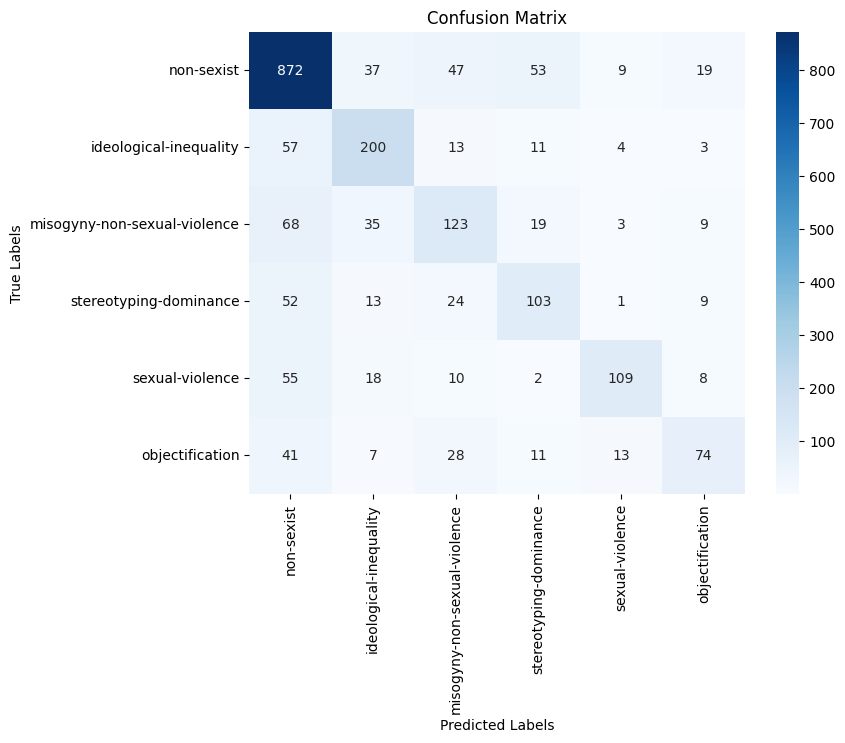

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones en el conjunto de pruebas
predictions = trainer.predict(tokenized_ds["test"]).predictions
predicted_labels = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de pruebas
true_labels = tokenized_ds["test"]["label"]

# Calcular la matriz de confusión
confusion = confusion_matrix(true_labels, predicted_labels)

# Mostrar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


#**Resultados**

---
Es necesario adaptar el dataset a las exisgencias del modelo. Cambiar el nombre de la clase objetivo y convertir los valores de formato strng a int.
Utilizando el modelo preentrenado [Robertutiio](https://huggingface.co/pysentimiento/robertuito-base-cased) x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español.

##<font color='brown'>**Train**</font>

```
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
{'eval_loss': 0.8809642195701599, 'eval_f1': 0.5315206298539316, 'eval_recall': 0.5056654596730847, 'eval_runtime': 3.4558, 'eval_samples_per_second': 205.16, 'eval_steps_per_second': 25.753, 'epoch': 1.0}
{'eval_loss': 0.816580057144165, 'eval_f1': 0.5959356783733845, 'eval_recall': 0.5740393540718135, 'eval_runtime': 3.43, 'eval_samples_per_second': 206.706, 'eval_steps_per_second': 25.948, 'epoch': 2.0}
{'eval_loss': 0.9064635038375854, 'eval_f1': 0.6154138379624038, 'eval_recall': 0.5966786685260929, 'eval_runtime': 3.2736, 'eval_samples_per_second': 216.579, 'eval_steps_per_second': 27.187, 'epoch': 3.0}
{'eval_loss': 1.0341873168945312, 'eval_f1': 0.6231203840159453, 'eval_recall': 0.6308207181242749, 'eval_runtime': 3.3595, 'eval_samples_per_second': 211.046, 'eval_steps_per_second': 26.492, 'epoch': 4.0}
{'eval_loss': 1.044889211654663, 'eval_f1': 0.6251899235870882, 'eval_recall': 0.61380740846886, 'eval_runtime': 3.3521, 'eval_samples_per_second': 211.512, 'eval_steps_per_second': 26.551, 'epoch': 5.0}
{'train_runtime': 278.9422, 'train_samples_per_second': 50.763, 'train_steps_per_second': 1.595, 'train_loss': 0.4916371549113413, 'epoch': 5.0}
TrainOutput(global_step=445, training_loss=0.4916371549113413, metrics={'train_runtime': 278.9422, 'train_samples_per_second': 50.763, 'train_steps_per_second': 1.595, 'train_loss': 0.4916371549113413, 'epoch': 5.0})
```
##<font color='brown'>**Evaluación**</font>

```
{'eval_loss': 1.2399922609329224, 'eval_f1': 0.5807876452470078, 'eval_recall': 0.5478841484376831, 'eval_runtime': 11.9175, 'eval_samples_per_second': 181.247, 'eval_steps_per_second': 22.656, 'epoch': 5.0}
{'eval_loss': 1.2399922609329224,
 'eval_f1': 0.5807876452470078,
 'eval_recall': 0.5478841484376831,
 'eval_runtime': 11.9175,
 'eval_samples_per_second': 181.247,
 'eval_steps_per_second': 22.656,
 'epoch': 5.0}
```





**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task1.**

##<font color='brown'>**Train**</font>



```
{'eval_loss': 0.4176936149597168, 'eval_f1': 0.82174555032325, 'eval_recall': 0.8229082111763676, 'eval_runtime': 3.9541, 'eval_samples_per_second': 179.308, 'eval_steps_per_second': 22.508, 'epoch': 1.0}
{'eval_loss': 0.42775365710258484, 'eval_f1': 0.815209195072988, 'eval_recall': 0.8154236101163475, 'eval_runtime': 6.7829, 'eval_samples_per_second': 104.527, 'eval_steps_per_second': 13.121, 'epoch': 2.0}
{'eval_loss': 0.5745871663093567, 'eval_f1': 0.8106394004624093, 'eval_recall': 0.8115121997803563, 'eval_runtime': 3.318, 'eval_samples_per_second': 213.686, 'eval_steps_per_second': 26.824, 'epoch': 3.0}
{'eval_loss': 0.7095562219619751, 'eval_f1': 0.8025383942070502, 'eval_recall': 0.8026309506756435, 'eval_runtime': 3.3712, 'eval_samples_per_second': 210.31, 'eval_steps_per_second': 26.4, 'epoch': 4.0}
{'eval_loss': 0.7335618138313293, 'eval_f1': 0.8081801543725631, 'eval_recall': 0.8082732496140317, 'eval_runtime': 3.3614, 'eval_samples_per_second': 210.924, 'eval_steps_per_second': 26.477, 'epoch': 5.0}
{'train_runtime': 286.882, 'train_samples_per_second': 49.358, 'train_steps_per_second': 1.551, 'train_loss': 0.19939609484726123, 'epoch': 5.0}
TrainOutput(global_step=445, training_loss=0.19939609484726123, metrics={'train_runtime': 286.882, 'train_samples_per_second': 49.358, 'train_steps_per_second': 1.551, 'train_loss': 0.19939609484726123, 'epoch': 5.0})
```
##<font color='brown'>**Evaluación**</font>


```
{'eval_loss': 0.935376763343811, 'eval_f1': 0.7887568619275936, 'eval_recall': 0.7911383872410912, 'eval_runtime': 12.0511, 'eval_samples_per_second': 179.237, 'eval_steps_per_second': 22.405, 'epoch': 5.0}
{'eval_loss': 0.935376763343811,
 'eval_f1': 0.7887568619275936,
 'eval_recall': 0.7911383872410912,
 'eval_runtime': 12.0511,
 'eval_samples_per_second': 179.237,
 'eval_steps_per_second': 22.405,
 'epoch': 5.0}
```




**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español,task1, sin preprocesamiento y reduciendo batch_size = 16**

##<font color='brown'>**Train**</font>


```
You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
 [885/885 05:25, Epoch 5/5]
Epoch	Training Loss	Validation Loss	F1	Recall
1	No log	0.427899	0.809099	0.809077
2	No log	0.494435	0.809683	0.812189
3	0.314600	0.809876	0.809373	0.810151
4	0.314600	1.020675	0.810835	0.810756
5	0.314600	1.021207	0.813792	0.813792
TrainOutput(global_step=885, training_loss=0.18647011848492812, metrics={'train_runtime': 325.8376, 'train_samples_per_second': 43.457, 'train_steps_per_second': 2.716, 'total_flos': 920132249475840.0, 'train_loss': 0.18647011848492812, 'epoch': 5.0})
```
##<font color='brown'>**Evaluación**</font>



```
{'eval_loss': 1.2259948253631592,
 'eval_f1': 0.7850877155362814,
 'eval_recall': 0.7872811066239263,
 'eval_runtime': 13.0904,
 'eval_samples_per_second': 165.006,
 'eval_steps_per_second': 20.626,
 'epoch': 5.0}
```




**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español,task1, sin preprocesamiento, añdiendo los tweets en inglés traducidos als español y reduciendo batch_size = 16**

# Train



```
Epoch	Training Loss	Validation Loss	F1	Recall
1	No log	0.452973	0.797775	0.797721
2	0.437700	0.603845	0.779150	0.779111
3	0.155100	1.225784	0.765031	0.765226
4	0.155100	1.459956	0.773834	0.773907
5	0.028200	1.535732	0.769324	0.769344
TrainOutput(global_step=1745, training_loss=0.1791297105116967, metrics={'train_runtime': 688.3193, 'train_samples_per_second': 40.541, 'train_steps_per_second': 2.535, 'total_flos': 1830442028810760.0, 'train_loss': 0.1791297105116967, 'epoch': 5.0})
```

#Evaluación



```
{'eval_loss': 1.4580191373825073,
 'eval_f1': 0.782227984476236,
 'eval_recall': 0.7847943112839197,
 'eval_runtime': 13.399,
 'eval_samples_per_second': 161.207,
 'eval_steps_per_second': 20.151,
 'epoch': 5.0}
```



**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español,task1, con preprocesamiento, añadiendo los tweets en inglés traducidos al español y reduciendo batch_size = 16**

#Train


```
{'eval_loss': 0.46306246519088745, 'eval_f1': 0.7856132127560457, 'eval_recall': 0.7855667775177567, 'eval_runtime': 7.4273, 'eval_samples_per_second': 187.956, 'eval_steps_per_second': 23.562, 'epoch': 1.0}
{'loss': 0.4313, 'learning_rate': 3.567335243553009e-05, 'epoch': 1.43}
{'eval_loss': 0.622553825378418, 'eval_f1': 0.7729197230488031, 'eval_recall': 0.7729831260007389, 'eval_runtime': 7.3441, 'eval_samples_per_second': 190.085, 'eval_steps_per_second': 23.829, 'epoch': 2.0}
{'loss': 0.1631, 'learning_rate': 2.1346704871060173e-05, 'epoch': 2.87}
{'eval_loss': 1.1996393203735352, 'eval_f1': 0.7633533672368624, 'eval_recall': 0.7640883524243545, 'eval_runtime': 7.6693, 'eval_samples_per_second': 182.024, 'eval_steps_per_second': 22.818, 'epoch': 3.0}
{'eval_loss': 1.4765957593917847, 'eval_f1': 0.7721833913230902, 'eval_recall': 0.7724227121566696, 'eval_runtime': 7.4457, 'eval_samples_per_second': 187.491, 'eval_steps_per_second': 23.504, 'epoch': 4.0}
{'loss': 0.0297, 'learning_rate': 7.020057306590258e-06, 'epoch': 4.3}
{'eval_loss': 1.5640625953674316, 'eval_f1': 0.7671889905074478, 'eval_recall': 0.7672517140862997, 'eval_runtime': 7.4214, 'eval_samples_per_second': 188.105, 'eval_steps_per_second': 23.581, 'epoch': 5.0}
{'train_runtime': 649.4123, 'train_samples_per_second': 42.97, 'train_steps_per_second': 2.687, 'train_loss': 0.17986209699964115, 'epoch': 5.0}
TrainOutput(global_step=1745, training_loss=0.17986209699964115, metrics={'train_runtime': 649.4123, 'train_samples_per_second': 42.97, 'train_steps_per_second': 2.687, 'train_loss': 0.17986209699964115, 'epoch': 5.0})
```
#Evaluación


```
{'eval_loss': 1.3194084167480469, 'eval_f1': 0.7933893868853219, 'eval_recall': 0.7957753675021532, 'eval_runtime': 11.6127, 'eval_samples_per_second': 186.003, 'eval_steps_per_second': 23.25, 'epoch': 5.0}
{'eval_loss': 1.3194084167480469,
 'eval_f1': 0.7933893868853219,
 'eval_recall': 0.7957753675021532,
 'eval_runtime': 11.6127,
 'eval_samples_per_second': 186.003,
 'eval_steps_per_second': 23.25,
 'epoch': 5.0}
```




**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español,task1, con preprocesamiento, añadiendo los tweets en inglés traducidos al español, añadiendo datos mediante técnica swapping y reduciendo batch_size = 16**

#Train


```
{'loss': 0.4287, 'learning_rate': 4.231950844854071e-05, 'epoch': 0.77}
{'eval_loss': 0.28115761280059814, 'eval_f1': 0.8863093429464013, 'eval_recall': 0.886421469577369, 'eval_runtime': 13.4422, 'eval_samples_per_second': 193.718, 'eval_steps_per_second': 24.252, 'epoch': 1.0}
{'loss': 0.2045, 'learning_rate': 3.4639016897081416e-05, 'epoch': 1.54}
{'eval_loss': 0.3857676088809967, 'eval_f1': 0.9105221546638917, 'eval_recall': 0.9108624938625978, 'eval_runtime': 15.3656, 'eval_samples_per_second': 169.469, 'eval_steps_per_second': 21.216, 'epoch': 2.0}
{'loss': 0.0899, 'learning_rate': 2.6958525345622122e-05, 'epoch': 2.3}
{'eval_loss': 0.5143325924873352, 'eval_f1': 0.9143214666856115, 'eval_recall': 0.9142899969785097, 'eval_runtime': 13.4567, 'eval_samples_per_second': 193.51, 'eval_steps_per_second': 24.226, 'epoch': 3.0}
{'loss': 0.0351, 'learning_rate': 1.927803379416283e-05, 'epoch': 3.07}
{'loss': 0.0093, 'learning_rate': 1.1597542242703534e-05, 'epoch': 3.84}
{'eval_loss': 0.5632923245429993, 'eval_f1': 0.9196407253709283, 'eval_recall': 0.9194076462590173, 'eval_runtime': 13.5603, 'eval_samples_per_second': 192.031, 'eval_steps_per_second': 24.041, 'epoch': 4.0}
{'loss': 0.0049, 'learning_rate': 3.9170506912442395e-06, 'epoch': 4.61}
{'eval_loss': 0.5831766724586487, 'eval_f1': 0.9166516092194943, 'eval_recall': 0.9167638422026665, 'eval_runtime': 13.4608, 'eval_samples_per_second': 193.45, 'eval_steps_per_second': 24.218, 'epoch': 5.0}
{'train_runtime': 1195.97, 'train_samples_per_second': 43.538, 'train_steps_per_second': 2.722, 'train_loss': 0.11896813933933569, 'epoch': 5.0}
TrainOutput(global_step=3255, training_loss=0.11896813933933569, metrics={'train_runtime': 1195.97, 'train_samples_per_second': 43.538, 'train_steps_per_second': 2.722, 'train_loss': 0.11896813933933569, 'epoch': 5.0})
```
#Evaluación



```
{'eval_loss': 1.4832550287246704, 'eval_f1': 0.7999890254609306, 'eval_recall': 0.8015655819281422, 'eval_runtime': 11.5343, 'eval_samples_per_second': 187.268, 'eval_steps_per_second': 23.408, 'epoch': 5.0}
{'eval_loss': 1.4832550287246704,
 'eval_f1': 0.7999890254609306,
 'eval_recall': 0.8015655819281422,
 'eval_runtime': 11.5343,
 'eval_samples_per_second': 187.268,
 'eval_steps_per_second': 23.408,
 'epoch': 5.0}
```




Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task2. Hemos incorporado los tweets en inglés, que han sido traducidos al español.

#Train


```
{'eval_loss': 0.9190000295639038, 'eval_f1': 0.5901528860406369, 'eval_recall': 0.5957352086839005, 'eval_runtime': 7.1185, 'eval_samples_per_second': 196.108, 'eval_steps_per_second': 24.584, 'epoch': 1.0}
{'eval_loss': 0.9517709612846375, 'eval_f1': 0.5928994506981274, 'eval_recall': 0.5779724549259689, 'eval_runtime': 7.0092, 'eval_samples_per_second': 199.167, 'eval_steps_per_second': 24.967, 'epoch': 2.0}
{'loss': 0.6948, 'learning_rate': 2.1428571428571428e-05, 'epoch': 2.86}
{'eval_loss': 1.1642926931381226, 'eval_f1': 0.568597598367809, 'eval_recall': 0.5460934733420615, 'eval_runtime': 7.1272, 'eval_samples_per_second': 195.869, 'eval_steps_per_second': 24.554, 'epoch': 3.0}
{'eval_loss': 1.3256367444992065, 'eval_f1': 0.5913884118946812, 'eval_recall': 0.5850167324387883, 'eval_runtime': 7.0329, 'eval_samples_per_second': 198.497, 'eval_steps_per_second': 24.883, 'epoch': 4.0}
{'eval_loss': 1.4387211799621582, 'eval_f1': 0.5917159869995268, 'eval_recall': 0.5769648662601905, 'eval_runtime': 7.3845, 'eval_samples_per_second': 189.044, 'eval_steps_per_second': 23.698, 'epoch': 5.0}
{'train_runtime': 583.1049, 'train_samples_per_second': 47.856, 'train_steps_per_second': 1.501, 'train_loss': 0.44934688895089286, 'epoch': 5.0}
TrainOutput(global_step=875, training_loss=0.44934688895089286, metrics={'train_runtime': 583.1049, 'train_samples_per_second': 47.856, 'train_steps_per_second': 1.501, 'train_loss': 0.44934688895089286, 'epoch': 5.0})
```
#Evaluación



```
{'eval_loss': 1.4549012184143066, 'eval_f1': 0.5479621072679599, 'eval_recall': 0.5208229176396909, 'eval_runtime': 13.013, 'eval_samples_per_second': 165.988, 'eval_steps_per_second': 20.749, 'epoch': 5.0}
{'eval_loss': 1.4549012184143066,
 'eval_f1': 0.5479621072679599,
 'eval_recall': 0.5208229176396909,
 'eval_runtime': 13.013,
 'eval_samples_per_second': 165.988,
 'eval_steps_per_second': 20.749,
 'epoch': 5.0}
```




Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task2. Hemos incorporado los tweets en inglés, que han sido traducidos al español.Además se ha configurado learning_rate y weights_decay pero no hay mejora en relación a los resutados anteriores.

En la evaluación del modelo para el conjunto de test : eval_f1': 0.555182487114667,

Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task2. Hemos incorporado los tweets en inglés, que han sido traducidos al español.Además se ha configurado weights_decay= 0.001 y dropout de 0.2 pero no hay mejora en relación a los resutados anteriores.

En la evaluación del modelo para el conjunto de test eval_f1': 0.5811604818154509


Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task2. Hemos incorporado los tweets en inglés, que han sido traducidos al español.No se ha preprocesado los datos Pero no hay mejora en relación a los resutados anteriores.

En la evaluación del modelo para el conjunto de test
'eval_f1': 0.5633417329073163,

**Utilizando el modelo preentrenado Robertutio x defecto sin ninguna capa, configuración adicional sobre un conjunto de datos en idioma español y task2. Hemos incorporado los tweets en inglés, que han sido traducidos al español. Se han preprocesado los datos y se han añadido más datos mediante la técnica de swapping. **

#Train


```
{'loss': 0.8724, 'learning_rate': 4.231950844854071e-05, 'epoch': 0.77}
{'eval_loss': 0.5662493109703064, 'eval_f1': 0.7440733528939002, 'eval_recall': 0.7411806287335341, 'eval_runtime': 14.9963, 'eval_samples_per_second': 173.643, 'eval_steps_per_second': 21.739, 'epoch': 1.0}
{'loss': 0.394, 'learning_rate': 3.4639016897081416e-05, 'epoch': 1.54}
{'eval_loss': 0.5019964575767517, 'eval_f1': 0.8185209705425712, 'eval_recall': 0.8161521279110483, 'eval_runtime': 15.018, 'eval_samples_per_second': 173.392, 'eval_steps_per_second': 21.707, 'epoch': 2.0}
{'loss': 0.1912, 'learning_rate': 2.6958525345622122e-05, 'epoch': 2.3}
{'eval_loss': 0.6716213822364807, 'eval_f1': 0.8388412495409724, 'eval_recall': 0.8347765226476151, 'eval_runtime': 15.0332, 'eval_samples_per_second': 173.217, 'eval_steps_per_second': 21.685, 'epoch': 3.0}
{'loss': 0.0761, 'learning_rate': 1.927803379416283e-05, 'epoch': 3.07}
{'loss': 0.028, 'learning_rate': 1.1597542242703534e-05, 'epoch': 3.84}
{'eval_loss': 0.75853431224823, 'eval_f1': 0.8407504868343857, 'eval_recall': 0.8385871943132105, 'eval_runtime': 15.2047, 'eval_samples_per_second': 171.263, 'eval_steps_per_second': 21.441, 'epoch': 4.0}
{'loss': 0.0133, 'learning_rate': 3.9170506912442395e-06, 'epoch': 4.61}
{'eval_loss': 0.7829371094703674, 'eval_f1': 0.8397383026772145, 'eval_recall': 0.8383871208433415, 'eval_runtime': 15.0988, 'eval_samples_per_second': 172.464, 'eval_steps_per_second': 21.591, 'epoch': 5.0}
{'train_runtime': 1308.0657, 'train_samples_per_second': 39.807, 'train_steps_per_second': 2.488, 'train_loss': 0.2426444579562467, 'epoch': 5.0}
TrainOutput(global_step=3255, training_loss=0.2426444579562467, metrics={'train_runtime': 1308.0657, 'train_samples_per_second': 39.807, 'train_steps_per_second': 2.488, 'train_loss': 0.2426444579562467, 'epoch': 5.0})
```

#Evaluación


```
{'eval_loss': 2.0948662757873535, 'eval_f1': 0.6018691313144745, 'eval_recall': 0.5814538579321941, 'eval_runtime': 12.1921, 'eval_samples_per_second': 177.163, 'eval_steps_per_second': 22.145, 'epoch': 5.0}
{'eval_loss': 2.0948662757873535,
 'eval_f1': 0.6018691313144745,
 'eval_recall': 0.5814538579321941,
 'eval_runtime': 12.1921,
 'eval_samples_per_second': 177.163,
 'eval_steps_per_second': 22.145,
 'epoch': 5.0}
```

